# Comparsion between _Jane Eyer_ and _Wuthering Heights_: 
# Is _Wuthering Heights_ a crappy nevol while _Jane Eyre_ is a world-renowned masterpiece? 

# Introduction

_Jane Eyre_ and _Wuthering Heights_ are the two pearls of the 19th century literary. They were written by Charlotte Bronte and Emily Bronte, who were two sisters of the Bronte sisters. Since a long time ago, the critics have been comparing the contents, styles, and values of these two works and the two authors. 

The publication history of and critical response to _Wuthering Heights_ and _Jane Eyre_ are intertwined. _Wuthering Heights_ was accepted for publication before Charlotte had finished writing _Jane Eyre_. However, the publisher delayed bringing _Wuthering Heights_ out, with the result that _Jane Eyre_ was published first. Then, _Jane Eyre_ became a best seller.

Initially _Jane Eyre_ was regarded as the best of the Brontë sisters' novels, a judgment which continued nearly to the end of the century. By the 1880s critics began to place Emily's achievement above Charlotte's; a major factor in this shift was Mary Robinson's book-length biography of Emily (1883). In 1926, Charles Percy Sanger worked out the chronology of _Wuthering Heights_ by closely examining the text; though other critics have since worked out alternate chronologies, his work affirmed Emily's literary craft and meticulous planning of the novel and disproved Charlotte's presentation of her sister as an unconscious artist who "did not know what she had done." 

Until now, critics are constantly arguing about these two novels. Some critics' words are as followed:
- Here all the faults of Jane Eyre (by Charlotte Brontë) are magnified a thousand fold, and the only consolation which we have in reflecting upon it is that it will never be generally read.(James Lorimer,1847)
- We rise from the perusal of Wuthering Heights as if we had come fresh from a pest-house. Read Jane Eyre is our advice, but burn Wuthering Heights…(Paterson’s Magazine (USA), March 1848)
- How a human being could have attempted such a book as the present without committing suicide before he had finished a dozen chapters, is a mystery. It is a compound of vulgar depravity and unnatural horrors…(Graham’s Lady’s Magazine (USA),July 1848)

Some people said that Jane Eyre's plot is simple and lacks profound thinking of society and literary value, while some people said Wuthering Heights is an evil novel with wrong values. It is not difficult to find out that each critic's attitude towards these two books are different because their attitudes were based on their preferences, life experience and so on. Just as a famous quote from Shakespeare. There are a thousand Hamlets in a thousand people's eyes. (Shakespeare) The critic's comments are always subjective, and can’t be completely objective.

Comparing with the unavoidable subjective judgments from critics, computer algorithms will analyze these two books more objectively. In this project, I will apply some techniques of Digital Humanities to analyze the contents, motif, topic and writing style of these two books, focusing on drawing more objective conclusions of their characteristics. Then I will use experimental results to explain why some critics made such comments. Through this project, we can appreciate these two famous novels more objectively and rationally without prejudices and biases.

# Experiment-Computational Analysis

In [95]:
#import modules that will be used in experiment
import nltk
from nltk.corpus import sentiwordnet as sw
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
import requests
import collections
import statistics
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pyLDAvis.sklearn
from more_itertools import chunked
from itertools import combinations
import networkx as nx
import holoviews as hv
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#figures configuration
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
# load models will be used in experiment
nlp = spacy.load('en_core_web_lg')

In [4]:
# set max_length configuration
nlp.max_length=3000000

### Preparation Work

#### Corpus and format

In [5]:
#open files for later analysis
janeEyre=open("JaneEyre.md",encoding='UTF-8').read()
wutheringHeights=open("WutheringHeights.md",encoding='UTF-8').read()

In [40]:
#define titles of two novels
titles=['Jane Eyre','Wuthering Heights']

In [6]:
#using Spacy to create docs
janeEyreDocs=nlp(janeEyre)
wutheringHeightsDocs=nlp(wutheringHeights)

In [7]:
janeEyreSents=janeEyreDocs.sents
wutheringHeightsSents=wutheringHeightsDocs.sents

In [8]:
#create word tokens
janeEyreTokens=nltk.word_tokenize(janeEyre)
wutheringHeightsTokens=nltk.word_tokenize(wutheringHeights)

In [9]:
#Clean the tokens
janeEyreTokensClean = [token.lower() for token in janeEyreTokens if token.isalpha()]
wutheringHeightsTokensClean = [token.lower() for token in wutheringHeightsTokens if token.isalpha()]

In [10]:
#change format to Text
janeEyreText=nltk.Text(janeEyreTokensClean)
wutheringHeightsText=nltk.Text(wutheringHeightsTokensClean)

In [11]:
#create tags
janeEyreTags=nltk.pos_tag(janeEyreTokensClean)
wutheringHeightsTags=nltk.pos_tag(wutheringHeightsTokensClean)

#### Split nevols by contents

In [12]:
#chapter 1-9: Jane's chlidhood
janeEyre0=janeEyre.split('## CHAPTER I')[1].split('## CHAPTER X')[0]

In [13]:
#chapter 10-26: Jane live in Thornfield Manor
janeEyre1=janeEyre.split('## CHAPTER X')[1].split('## CHAPTER XXVII')[0]

In [14]:
#chapter27-35: Jane Eyre leave Thornfield Manor
janeEyre2=janeEyre.split('## CHAPTER XXVII')[1].split('## CHAPTER XXXVI')[0]

In [15]:
#chapter36-38: Jane Eyre back to Thornfield Manor and married with Mr. Rochester.
janeEyre3=janeEyre.split('## CHAPTER XXXVI')[1]

In [16]:
janeEyreParts=[janeEyre0,janeEyre1,janeEyre2,janeEyre3]

In [17]:
#chapter 1-5: Heathcliff live in Wuthering Heights
wutheringHeights0=wutheringHeights.split('## CHAPTER I')[1].split('## CHAPTER VI')[0]

In [18]:
#chapter 6-9: Heathcliff was abused and leave Wuthering Heights; Catherine married to Linton
wutheringHeights1=wutheringHeights.split('## CHAPTER VI')[1].split('## CHAPTER X')[0]

In [19]:
#chapter 10-30: Heathcliff's revenge
wutheringHeights2=wutheringHeights.split('## CHAPTER X')[1].split('## CHAPTER XXXI')[0]

In [20]:
#chapter 31-34: Heathcliff stopped revenge and rediscovered his love.
wutheringHeights3=wutheringHeights.split('## CHAPTER XXXI')[1]

In [21]:
wutheringHeightsParts=[wutheringHeights0,wutheringHeights1,wutheringHeights2,wutheringHeights3]

In [22]:
#define parts title
partsTitles=["J1-9","J10-26",'J27-35','J36-38','W1-5','W6-9','W10-30','W31-34']

In [23]:
#create part Docs
JEWHPartsDoc=[nlp(part) for part in janeEyreParts+wutheringHeightsParts]

In [24]:
janeEyreChapters=janeEyre.split('## CHAPTER ')[1:]

In [25]:
wutheringHeightsChapters=wutheringHeights.split('## CHAPTER ')[1:]

In [26]:
chapterTitles=['JE-'+chapter.split('\n')[0] for chapter in janeEyreChapters]

In [27]:
chapterTitles+=['WH-'+chapter.split('\n')[0] for chapter in wutheringHeightsChapters]

In [28]:
#create part Docs
JEWHChaptersDoc=[nlp(chapter) for chapter in janeEyreChapters+wutheringHeightsChapters]

## Contents

### Semantic Analysis

In [29]:
pca = PCA(n_components=3)

In [30]:
pcaOut=pca.fit_transform([part.vector for part in JEWHPartsDoc])

In [31]:
df = pd.DataFrame(pcaOut)

In [32]:
def plotResults3D(df, labels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(labels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

In [33]:
# plotResults3D(df, partsTitles) #If you want to see the result, just remove '#' and run it

#### Discussion:
- W10-30, W31-34 and J27-35 are same in semantic. These three parts described Heathcliff's revenge, Heathcliff stopped revenge and rediscovered his love, and Jane Eyre left Thornfield Manor separately. The three parts are same in semantic because they consist plots of betrayal, leaving, death and so on. They express negative feeling.
- W6-9 and J36-38 are almost the same. W6-9 talk about Heathcliff was abused and leave Wuthering Heights, while Catherine married to Linton. J36-38 talk about Jane Eyre back to Thornfield Manor and married with Mr. Rochester. These two parts are very similar probably because they both describe the life of the upper class and the joy of marriage. They also include plots like leaving and being blindness, which are not good things.
- J1-9 and W1-5 are different. Although these two parts both describe the childhood life of protagonists in these two books, they are different because Jane's parents died, so she have to stay in Lowood orphanage, which is a place full of strict rules. She have to learning and behaving good every day. While Heathcliff and Catherine were lived in Wuthering Heights, and played in the field every day. Their parents were living.

### Sentiment Analysis

In [34]:
def getLemma(docs):
    lemmaList=[]
    for sent in docs.sents:
        sentLemmaList=[]
        for w in sent:
            if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'):
                sentLemmaList.append((w.lemma_,w.pos_))
        lemmaList.append(sentLemmaList)
    return lemmaList

In [35]:
def getSentScore(docs):
    sentScores=[]
    for sent in getLemma(docs):
        scores=[]
        for word, pos in sent:
            synPos=pos.lower()[0]
            if synPos not in ['a','n','v']:
                continue
            synsets=list(sw.senti_synsets(word, synPos))
            if (type(synsets)==list) and len(synsets)>0:
                synset=synsets[0]
                score=synset.pos_score()-synset.neg_score()
                scores.append(score)
        if len(scores)>0:
            avgScores=sum(scores)/len(scores)
            sentScores.append(avgScores)
    return sentScores

In [37]:
JESentScores=getSentScore(janeEyreDocs)
WHSentScores=getSentScore(wutheringHeightsDocs)

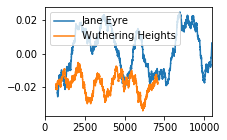

In [122]:
plt.rcParams['figure.figsize'] = [3, 2]
df = pd.DataFrame([JESentScores, WHSentScores], index=titles).T
df.rolling(window=700).mean().plot()

#### Discussion:
- As we can see from figure, Jane Eyre's sentiment curve almost always be above Wuthering Heights' curve. It can be said that _Wuthering Heights_ is more negative and _Jane Eyre_ is more positive. 
- The only place where the Wuthering Heights' curve is above Jane Eyre's is in front of the novel, that is the childhood of the protagonists. As we just analyzed, Jane Eyre's childhood was more tragic. 
- Almost the whole book of _Wuthering Heights_ is in the negative range. That's why people don't like _Wuthering Heights_ at first. It is hard for people to accept so many sad things and negative feelings at the beginning.

## Motif

### dispersion_plot

In [51]:
#Find positions of certain words for Jane Eyre and Wuthering Heights
#plt.subplot(2,2,1)
#wutheringHeightsText.dispersion_plot(['love','hate','study','education','money','live','death','hope','hopeless','despair'])
#plt.subplot(2,2,2)
#janeEyreText.dispersion_plot(['love','hate','study','education','money','live','death','hope','hopeless','despair'])
#plt.show()
#If you want to see the result, delete '#' and run the cell

#### Discussion:
- 'love' appeared more often in  _Jane Eyre_ than in _Wuthering Heights_.
'death' appeared more often in _Wuthering Heights_ than in _Jane Eyre_.
But 'love' appeared more often than 'hate' even in _Wuthering Heights_. _Wuthering Heights_ is a negative novel from emotional perspective, but its motif is positive. Just like flowers bloomed in the desert or light in the darkness. At first people may not see the positive side of _Wuthering Mountain_, but they will find the positive side of it if they read more times.
- _Wuthering Heights_ has less 'education' and 'study' appeared, reflecting the life of bottom peopel and the cruel revenge, while _Jane Eyre_ mentioned more about study and education, which imply the upper class life.
- 'live' appeared more often than 'death' in _Jane Eyre_, while 'death' appeared more often than 'live' in _Wuthering Heights_. _Wuthering Heights_ is indeed a negative and miserable novel. 
- 'Hope' appeared more often in Jane Eyre than Wuthering Heights, while 'hopeless' and 'despair' also appeared more frequent in Jane Eyre. Also, 'hopeless' and 'despair' appeared less than 'hope' in both novels. It seems like Emily was just have less emotion. She was not what some critics said, like a insane woman, who promoting distorted values. She had a common view, that hope is more worth than hopeless.

### Longest Ngrams

In [52]:
#funcion of finding longest ngrams that appeared at least twice
def findLongestNgram(Tokens):
    longestNgram=[]
    longestNgram2=[]
    for i in range (2,100):
        longestNgram2=[]#clear the list
        ngrams=list(nltk.ngrams(Tokens,i))#create the ngrams with i's value
        res=collections.Counter(ngrams) #count each ngram
        for key in list(res.keys()):
            #if this ngram that occurs at least twice
            if int(res[key]) >=2:
                longestNgram2.append(key)#add this ngram to longestNgram2
        #if there exits a ngram in longestNgram2
        if len(longestNgram2)>0:
            longestNgram=longestNgram2#update longestNgram
    return longestNgram

In [53]:
#find longest ngram for Jane Eyre
findLongestNgram(janeEyreTokensClean)

[('a',
  'glorious',
  'thing',
  'to',
  'have',
  'the',
  'hope',
  'of',
  'living',
  'with',
  'you')]

In [54]:
#find longest ngram for Wuthering Heights
findLongestNgram(wutheringHeightsTokensClean)

[('at', 'the', 'end', 'of', 'the', 'house', 'and'),
 ('at', 'the', 'top', 'of', 'the', 'steps', 'and'),
 ('have', 'only', 'to', 'do', 'with', 'the', 'present'),
 ('common', 'humanity', 'and', 'a', 'sense', 'of', 'duty')]

#### Discussion:
-  'a glorious thing to have the hope of living with you': Jane and Mr. Rochester said it. That's reveal the motif of the story, the love between Jane and Rochester.
- 'I have only to do with the present' was said by Catherine when she wanted married to Edgar.
- "by common humanity, and a sense of duty" was a sarcasm to Heathcliff, which reflected part of the story that evil Heathcliff done many evil things

## Topic

### LDA-Topic modeling

In [55]:
#define chunk function
def chunk(tokens, size): 
    return list(zip(*[tokens[i::size] for i in range(size)])) 

In [56]:
#create chunks for janeEyre
janeEyreChunks=chunk(janeEyreTokensClean,300)
janeEyreChunks = [' '.join(chunk) for chunk in janeEyreChunks]

In [57]:
#create chunk for wutheringHeights
wutheringHeightsChunks=chunk(wutheringHeightsTokensClean,300)
wutheringHeightsChunks = [' '.join(chunk) for chunk in wutheringHeightsChunks]

In [58]:
# define a function to find topic
def topicModel(docs, numTopics=8, maxFeats=None,min_df=2,max_df=0.95): 
    cv = CountVectorizer(stop_words='english', 
                         min_df=min_df, max_df=max_df, max_features=maxFeats)
    counts = cv.fit_transform(docs)
    wordLabels = cv.get_feature_names()
    lda = LatentDirichletAllocation(n_components=numTopics, max_iter=10, 
                                    learning_method='online',
                                    learning_offset=50., random_state=0)
    ldaOut=lda.fit_transform(counts)
    
    topicLabels=[]
    for i, topic in enumerate(lda.components_):
        print("Topic {}".format(i))
        topicLabel = " ".join([wordLabels[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(topicLabel)
        topicLabels.append(topicLabel)
        
    return lda, ldaOut,counts, cv, topicLabels #return lda, ldaOut, counts and cv, topicLabels

In [59]:
#get topic model from janeEyre
JELda,JELdaOut,JECounts,JECv,JETopicLabels=topicModel(janeEyreChunks,numTopics=5,min_df=2, max_df=0.99)

Topic 0
miss ingram french temple said brocklehurst mama lady did madame
Topic 1
said did rochester jane like little sir miss thought shall
Topic 2
bessie tart plate pages tales paradise interesting introductory bewick phantoms
Topic 3
quickening public site plants clothing institution fully miss teachers patients
Topic 4
herbs lowood prepare roses miss fewer spice wont luxuries potatoes


In [60]:
JEDF = pd.DataFrame(JELdaOut, columns=JETopicLabels)

In [106]:
#plt.rcParams['figure.figsize'] = [10, 6]
#plot topics
#JEDF[[JETopicLabels[0], JETopicLabels[1], JETopicLabels[2],JETopicLabels[3],JETopicLabels[4]]].plot()

#### Discussion:
- Topic 1: rochester & jane: appeared through whole book
- Topic 2: bessie tart plate pages tales paradise interesting introductory bewick phantoms is about the childhood of Jane
- Topic 3: teachers patients is Jane become a teacher

In [62]:
#get topic model from wutheringHeights
WHLda,WHLdaOut,WHCounts,WHCv,WHTopicLabels=topicModel(wutheringHeightsChunks,numTopics=5,min_df=0.1, max_df=0.99)

Topic 0
said heathcliff hareton did catherine come earnshaw joseph little master
Topic 1
till heathcliff long half bed hope said time need shall
Topic 2
mind heathcliff kitchen soon answered wuthering care present just joseph
Topic 3
heathcliff away eyes look like shall door man hand catherine
Topic 4
linton catherine heathcliff said did shall master edgar little time


In [63]:
WHDF = pd.DataFrame(WHLdaOut, columns=WHTopicLabels)

In [64]:
#plot topic model from wutheringHeights
#WHDF[[WHTopicLabels[0], WHTopicLabels[1], WHTopicLabels[4]]].plot()

#### Discussion:
- Topic 0: heathcliff, hareton, catherine: important roles name
- Topic 1: hope, need, shall: The childhood of heathcliff, hareton and catherine. In this time heathcliff was a kind child, he wasn't turn to a evil man.
- Topic 3: away: heathcliff leave the wuthering Heights. or he became a evil man, away from common people.
- Topic 3: eyes, hand: Linton's great blue eyes, Catherine beautiful eyes. Emily always use eyes and other things to describe each roles and their feeling. Her story was narrated by third person.
- Topic 4: liton, catherine, heathcliff, edgar: most important roles in the story. This story is about a group of people.

## Style

### Type token ratio

In [128]:
#define type/token ratio function
def typeTokenRatio(tokens):
    numTypes=len(set(tokens))
    numTokens=len(tokens)
    return "{:.4f}".format(numTypes/numTokens)

In [129]:
#calculate two stories' type/token ratio
ttrs={}
ttrs[titles[0]]=typeTokenRatio(janeEyreTokensClean)
ttrs[titles[1]]=typeTokenRatio(wutheringHeightsTokensClean)

In [130]:
ttrs

{'Jane Eyre': '0.0666', 'Wuthering Heights': '0.0798'}

#### Discussion:
- _Wuthering Heights_ has more different words than _Jane Eyre_.
It might be _Wuthering Heights_ is a more complex story than _Jane Eyre_ and the time period of this story is longer, so it contains more diversity words

### Pattern

In [68]:
#fuction that find pattern: like a JJ NN
def likeAJJNN(pairs):
    matches=[]
    for i, pair in enumerate(pairs):
        word=pair[0]
        pos = pair[1]
        if i<len(pairs)-4:
            nWord=pairs[i+1][0]
            nnWord=pairs[i+2][0]
            nnWordPOS=pairs[i+2][1]
            nnnWord=pairs[i+3][0]
            nnnWordPOS=pairs[i+3][1]
            if word=="like" and nWord=="a" and nnWordPOS=="JJ" and nnnWordPOS=="NN":
                matches.append(tuple([word,nWord,nnWord,nnnWord]))
    return matches

In [69]:
#show like a JJ NN for Jane Eyre, sorted by appeared tims
collections.Counter(likeAJJNN(janeEyreTags)).most_common(20)

[(('like', 'a', 'mad', 'cat'), 2),
 (('like', 'a', 'pale', 'throne'), 1),
 (('like', 'a', 'dark', 'deposit'), 1),
 (('like', 'a', 'carved', 'mask'), 1),
 (('like', 'a', 'bible', 'lay'), 1),
 (('like', 'a', 'troubled', 'spirit'), 1),
 (('like', 'a', 'new', 'scene'), 1),
 (('like', 'a', 'new', 'picture'), 1),
 (('like', 'a', 'dian', 'i'), 1),
 (('like', 'a', 'common', 'mortal'), 1),
 (('like', 'a', 'second', 'danae'), 1),
 (('like', 'a', 'dutiful', 'child'), 1),
 (('like', 'a', 'soft', 'trace'), 1),
 (('like', 'a', 'greek', 'face'), 1),
 (('like', 'a', 'disappointed', 'child'), 1),
 (('like', 'a', 'bright', 'flower'), 1),
 (('like', 'a', 'trampled', 'street'), 1),
 (('like', 'a', 'physician', 'watching'), 1),
 (('like', 'a', 'neophyte', 'respect'), 1),
 (('like', 'a', 'tangible', 'reproach'), 1)]

In [70]:
#show like a JJ NN for Wuthering Heights, sorted by appeared tims
collections.Counter(likeAJJNN(wutheringHeightsTags)).most_common(20)

[(('like', 'a', 'foolish', 'mother'), 1),
 (('like', 'a', 'hungry', 'wolf'), 1),
 (('like', 'a', 'mad', 'dog'), 1),
 (('like', 'a', 'faithful', 'dog'), 1),
 (('like', 'a', 'young', 'greyhound'), 1),
 (('like', 'a', 'true', 'clown'), 1)]

#### Discussion:
- Charlotte use more analogies, she was more sensitive. That why many people love her story for her vivid description. But for Emily, her novel is always narrated in third people perspective, so the analogies will be less. Also, it might be Emily was a introverted woman. She was not that sensitive, and less used analogy.

### Stylometry

In [71]:
#initialize tfidf
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, max_features=5000,max_df=1.5,min_df=0.5,stop_words='english')

In [72]:
tfMatrix = tfidf.fit_transform(janeEyreChapters+wutheringHeightsChapters) #extract features of each chapter in Jane Eyre and Wuthering Heights

In [73]:
pca = PCA(n_components=2)

In [74]:
pcaOut = pca.fit_transform(tfMatrix.todense())

In [75]:
df = pd.DataFrame(pcaOut, index=chapterTitles,columns=['Component 1', 'Component 2']) #use data frame

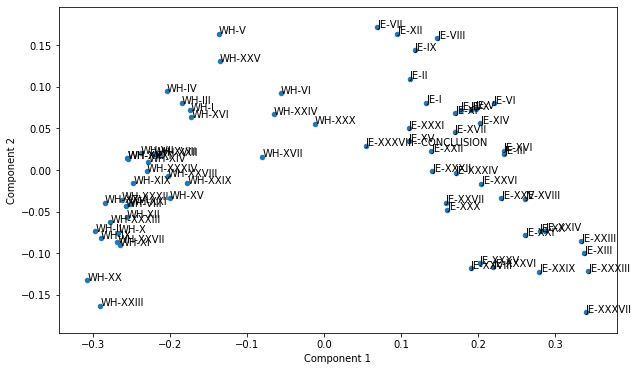

In [76]:
#plot the result
ax = df.plot(x='Component 1', y='Component 2', kind='scatter', figsize=(10,6))
for key, value in df.iterrows():
    ax.annotate(key, value)

#### Discussion:
- We can see that Charlotte and Emily had different writing styles. It might because _Jane Eyre_ is a autobiographical novel while _Wuthering Heights_ narrated by third person.
- WH-XXX and JE-XXXVIII--CONCLUSION are most same two chapters. WH-XXX is in Mr. Lockwood's perspective. This chapter is not all about memories, it's about what's happening. JE-XXXVIII--CONCLUSION is Jane's description of the ending of this novel, which has less dialogues, sentences start with 'I', and has more facts. That's why JE-XXXVIII--CONCLUSION and WH-XXX are similar.

### Collocation Frequency

In [77]:
janeEyreText.collocation_list(num=30) #find most frequently used collocaations for Jane Eyre

['miss temple',
 'miss ingram',
 'miss eyre',
 'thornfield hall',
 'jane eyre',
 'grace poole',
 'miss miller',
 'miss scatcherd',
 'helen burns',
 'colonel dent',
 'yes sir',
 'ere long',
 'last night',
 'moor house',
 'thousand pounds',
 'young ladies',
 'great deal',
 'ten minutes',
 'eight years',
 'third storey',
 'little girl',
 'next day',
 'five minutes',
 'three months',
 'twenty thousand',
 'human beings',
 'drew near',
 'two hours',
 'lord ingram',
 'miss oliver']

In [78]:
wutheringHeightsText.collocation_list(num=30) #find most frequently used collocaations for Wthering Heights

['wuthering heights',
 'young lady',
 'miss cathy',
 'thrushcross grange',
 'miss catherine',
 'great deal',
 'penistone crags',
 'edgar linton',
 'young man',
 'old man',
 'poor thing',
 'five minutes',
 'jabez branderham',
 'last night',
 'miss linton',
 'twenty years',
 'times seven',
 'take care',
 'one side',
 'every day',
 'make haste',
 'next day',
 'ten minutes',
 'ech ech',
 'six months',
 'three hours',
 'moon shone',
 'said heathcliff',
 'could bear',
 'one else']

#### Discussion:
- Collocation from janeEyreText, it can even represent the whole story: 'Thornfield Hall','Jane Eyre','Miss Scatcherd','Helen Burns','Yes sir','third storey','miss oliver'. This because the whole book was an autobiography, especially focus on Jane's love. All those things, like the mad woman in the third storey, Miss Oliver, Thornfield Hall are associated with her love story.
- 'Wuthering Heights','Thrushcross Grange' are the two main place that the two storise happened. Also, some name of heros in the book appeared.
- twenty years: _Wuthering Heights_ has a longer story span.

### Word Propotions

In [79]:
counts=[]
for parts in [janeEyreTokensClean,wutheringHeightsTokensClean]:
    counts.append(collections.Counter(parts))#count each tokens
# use datd frame    
countsDF=pd.DataFrame(counts, index=['janeEyre','wutheringHeights']).fillna(0).T 

In [80]:
totalNumTokens=[len(tokens) for tokens in [janeEyreTokensClean,wutheringHeightsTokensClean]]
propotions = countsDF/totalNumTokens*100 #calculate propotion for each word
propotions['average']=propotions.mean(axis=1)
propotions['JE']=propotions['janeEyre']-propotions['average'] # find words that used more often in Jane Eyre
propotions['WH']=propotions['wutheringHeights']-propotions['average'] # find words that used more often in Wuthering Heights

In [81]:
propotions.sort_values('JE',ascending=False)[:10]

,janeEyre,wutheringHeights,average,JE,WH
of,2.356708,1.958792,2.157750,0.198958,-0.198958
was,1.373839,0.993091,1.183465,0.190374,-0.190374
a,2.419873,2.047145,2.233509,0.186364,-0.186364
i,3.926576,3.612765,3.769671,0.156905,-0.156905
my,1.207214,0.950681,1.078948,0.128266,-0.128266
the,4.240223,4.002403,4.121313,0.118910,-0.118910
in,1.499080,1.284657,1.391868,0.107212,-0.107212
rochester,0.198752,0.000000,0.099376,0.099376,-0.099376
had,0.811888,0.613172,0.712530,0.099358,-0.099358
jane,0.184594,0.000000,0.092297,0.092297,-0.092297


In [82]:
propotions.sort_values('WH',ascending=False)[:10]

,janeEyre,wutheringHeights,average,JE,WH
he,1.030243,1.811242,1.420743,-0.390500,0.390500
his,0.654520,1.249315,0.951918,-0.297398,0.297398
and,3.590059,4.058066,3.824062,-0.234003,0.234003
her,0.931139,1.363291,1.147215,-0.216076,0.216076
him,0.387158,0.814617,0.600888,-0.213730,0.213730
heathcliff,0.000000,0.404658,0.202329,-0.202329,0.202329
linton,0.000000,0.346345,0.173172,-0.173172,0.173172
she,0.802087,1.137107,0.969597,-0.167510,0.167510
catherine,0.000545,0.323373,0.161959,-0.161414,0.161414
to,2.778171,3.067626,2.922898,-0.144727,0.144727


#### Discussion:
- _Jane Eyre_ use i, my, me more often while _Wuthering Heights_ use he, his, her, him, she more often. This is because _Jane Eyre_ is an autobiographical novel and _Wuthering Heights_ is a novel narrated by a third person.

## Character Relationships Distance

In [83]:
#function to get average distance
def getDist(l1,l2): 
    dist = []
    for i in l1:
        for j in l2:
            d = abs(i-j)
            dist.append(d)
    return statistics.mean(dist)
#function for get distance for name in nameList        
def getCharacterDistances(doc,nameList):
    charactersObj = [word for word in doc if word.text.strip() in nameList]
    indexes = [[] for n in range(len(nameList))]        
    for ob in charactersObj:
        indexes[nameList.index(ob.text.strip())].append(ob.i)
    distances = [[0 for n in range(len(nameList))] for n in range(len(nameList))]
    for i,cha1 in enumerate(indexes):
        for cha2 in indexes[i+1:]:
            distances[i][indexes.index(cha2)] = getDist(cha1,cha2)
            distances[indexes.index(cha2)][i] = getDist(cha1,cha2)   
                                                                        
    return distances

In [84]:
#get result of distances of each pair of names in nameList
def getResults(doc,nameList):
    docDistances = getCharacterDistances(doc,nameList)
    flatDistances = []
    for item in docDistances:
        for d in item:
            flatDistances.append(d)
    R = np.array(flatDistances)
    n = int(np.sqrt(R.size))
    C = R.reshape((n,n))
    #plt.matshow(C, cmap = 'summer')
    #ax = plt.gca()
    #xlabels = ['0']+nameList
    #ylabels = xlabels
    #ax.set_xticklabels(xlabels)
    #ax.set_yticklabels(ylabels)
    print("{: ^10}".format(' '),end=' ')
    for name in nameList:
        print("{: ^10}".format(name),end=' ')
    print('\n')
    for i in range(0,n):
        print("{: <10}".format(nameList[i]),end=' ')
        for j in range(0,n):
            #plt.text(j,i, round(C[i,j],2), horizontalalignment='center', verticalalignment='center')
            if type(flatDistances[j+(i*n)])==float:
                print("{: ^10.2f}".format(flatDistances[j+(i*n)]),end=' ')
            else:
                print("{: ^10}".format(flatDistances[j+(i*n)]),end=' ')
        print('\n')
    #plt.show()

In [85]:
getResults(wutheringHeightsDocs,['Hindley','Catherine','Cathy','Heathcliff','Hareton','Edgar','Isabella'])

            Hindley   Catherine    Cathy    Heathcliff  Hareton     Edgar     Isabella  

Hindley        0       57064.44   50544.79   50938.81   71001.92   35936.03   32632.77  

Catherine   57064.44      0       49950.26   53565.18   52648.36   48684.54   48117.04  

Cathy       50544.79   49950.26      0       52173.06   55432.11   45687.68   44614.33  

Heathcliff  50938.81   53565.18   52173.06      0       59516.00   46792.99   45332.24  

Hareton     71001.92   52648.36   55432.11   59516.00      0       59624.88   60283.12  

Edgar       35936.03   48684.54   45687.68   46792.99   59624.88      0       30160.13  

Isabella    32632.77   48117.04   44614.33   45332.24   60283.12   30160.13      0      



In [119]:
getResults(janeEyreDocs,['Jane','Rochester','John','Helen','Rosamond','Mary','Eliza'])

              Jane    Rochester     John      Helen     Rosamond     Mary      Eliza    

Jane           0       73509.71   83380.48  117774.96   72589.11   77949.43   90010.99  

Rochester   73509.71      0       89339.08   91529.52   86826.75   83329.91   71642.94  

John        83380.48   89339.08      0      145422.52   51832.43   68136.98  114951.44  

Helen      117774.96   91529.52  145422.52      0      170952.35  148481.36   67962.01  

Rosamond    72589.11   86826.75   51832.43  170952.35      0       42853.51  125561.96  

Mary        77949.43   83329.91   68136.98  148481.36   42853.51      0      114375.59  

Eliza       90010.99   71642.94  114951.44   67962.01  125561.96  114375.59      0      



#### Discussion:
- We can see the values of distance in _Jane Eyre_ are lager than in _Wuthering Heights_. The larger distances means that the two characters are more apart. Therefore, we can find that the relationship between Jane Eyre's characters is looser, while the relationship between the characters in _Wuthering Heights_ is closer. This is because the story of _Wuthering Heights_ is very complex, all the characters are intertwined, while the characters in _Jane Eyre_ appear because of Jane.
- This method has some limitation, because some characters in _Wuthering Heights_ have the same name. It is hard to identify who exactly is, unless people annotate it.

### Social Network

In [87]:
WHNames=['Hindley','Catherine','Cathy','Heathcliff','Hareton','Edgar','Isabella']

In [117]:
JENames=['Jane','Rochester','John','Helen','Rosamond','Mary','Eliza']

In [89]:
wutheringHeightsParas=wutheringHeights.split('\n\n')

In [90]:
janeEyreParas=janeEyre.split('\n\n')

In [115]:
def getSocialNetwork(names,paras):
    combs = list(combinations(names, 2))
    counter = {comb: 0 for comb in combs}
    for para in paras: 
        for comb in combs: 
            if comb[0] in para and comb[1] in para: 
                counter[comb] += 1
    namesTuples = [(pair[0], pair[1], n) 
               for pair, n in counter.items()]
    socialGraph = nx.Graph()
    socialGraph.add_nodes_from(names)
    socialGraph.add_weighted_edges_from(namesTuples)
    weightsOnly = [t[2]/4 for t in namesTuples]
    nx.draw_networkx(socialGraph, 
                     width=weightsOnly,
                     node_color = 'pink',alpha=0.6, edge_color='red')

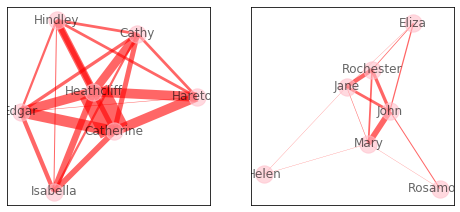

In [147]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.subplot(2,2,1)
getSocialNetwork(WHNames,wutheringHeightsParas)
plt.subplot(2,2,2)
getSocialNetwork(JENames,janeEyreParas)
plt.show()

#### Discussion:
- We can find that the relationship between the characters in _Wuthering Heights_ is centered on Catherine and Heathcliff. Each people have complicated relationship with almost all other people. _Jane Eyre_ formed a social network with Jane as its core. The relationships in _Jane Eyre_ are weaker than in _Wuthering Heights_. Since _Wuthering Heights_ is a long story that has gone through 20 years and almost every oe have some relationship with other characters.

# Conclusion

Through the above experimental analysis, it is true that _Jane Eyre_ and _Wuthering Heights_ are different in content, emotion, writing style and etc. Meanwhile, they also have some sort of similarity.
_Wuthering Height_ tells the story of Heathcliff, an abandoned boy, who was adopted by the old master of Wuthering Heights. He left the height because he was abused by his brother after his father died and the girl he loved, Catherine, get married to Edgar. Then he became rich and returned to the heights and start his crazy revenge. The whole story is full of a firm spirit, reacting against their oppressors, which expresses the unyielding determination of never give in and the spirit of revolt of the people at the bottom class. Also, it is always covered with a strange romantic atmosphere. At the end of this novel, Heathcliff gives up his revenge and died. Cathy and Hareton fall in love and finally live with hope. This plot shows the recovery of human nature and the yearning for love, hope, and a happy life. _Jane Eyre_ is an autobiographical novel, telling the story of Jane Eyre's life, from her miserable childhood to her romantic love with Mr. Rochester, which emphasizes on equality, dignity, respect, and love. _Jane Eyre_ express the purity dream to romantic love, and the desire for freedom and equality love, reflecting the pursuit of equality of people at the bottom class in the 19th.

As for the contents of the two stories, although they are almost totally different, some main contents are similar. They all talk about love, the revolt of bottom class people and the pursuit of a happy life. Moreover, their motifs are more similar, the pursuit of love, hope, and equality. This may be because the authors, the two sisters, are typical bottom class people, living in poverty. They long for romantic love and have the thought of equality. It can be said that these two works were masterpieces in the 19th because they both reflected the social problems of the British social class system and hierarchical oppression at that time. They expressed the theme that people at the bottom should pursue equality, which is significant at that time. The minor difference is that _Jane Eyre_ moderate advocates for equality, while _Wuthering Heights_ is more radical, which hold the notion that in order to achieve equality, revolt and revenge are indispensable.

Apart from that, the writing style and emotional style of those two novels are do have differences. _Jane Eyre_ is more positive, while _Wuthering Heights_ is more negative. _Jane Eyre_ used the first-person narration, while _Wuthering Heights_ used the third-person narration. _Jane Eyre_ used analogies and dialogs more than _Wuthering Heights_. These differences in writing style led to different feedbacks of the two books at the beginning. _Jane Eyre_'s first-person narrative perspective and vivid analogies make the whole novel very interesting and easy to read and understand. The complex relationship between the characters in _Wuthering Heights_ and the long narration make _Wuthering Heights_ difficult for readers to read and understand. At the same time, _Jane Eyre_ is more positive, which makes readers accept this novel, and appreciates this work easily. However, the negative plots of _Wuthering Heights_ made readers immersed in the negative mood, and difficult to judge the value behind the negative plots fairly. That's why _Jane Eyre_ became a bestseller immediately after the two books were published, while Wuthering Heights was been considered as a strange and crazy novel with few people like it.

Finally, is the analysis of two authors. There are many opinions about the image of Emily, but generally, they are negative. She was described as a stereotyped, conservative old virgin who likes to walk her dog or a very shy, unsociable woman who is uncomfortable when she goes out. All these points of view show that she is a strange person, avoiding society. However, Claire O'Callaghan said "Emily herself remains an enigmatic, even mysterious figure, often painted unfairly in a negative light. What we discover is that she was, in fact, a thoroughly modern woman."(Claire O'Callaghan, 2018)

Through experiments, I found that Emily is an introverted, and insensitive person with less emotional. But she is not a strange woman. She long for love, and she had common moral values, although she expressed them in _Wuthering Heights_ in a radical way. Her fantastic imagination made her novel different from other novels in the 19th, so people tend to regard her as a strange woman. 

The future debates about these two novels will never stop. When we appreciate these two works, we need to keep in mind that although critics keep arguing about these two novels, it is undeniable that these two works are like two gemstones with different colors, both are beautiful and shine like stars.

# Future Work

- Find TEI files for those two novels, aimming to do more accurate analysis.
- Compare more detailed information, for instance, color and place name appeared in these two novels.
- Compare characters, such as their speeking style, their personality, etc.

# Reference

[1] Reappraised, and Claire O'Callaghan. "Emily Brontë Reappraised". Goodreads.Com, 2019, https://www.goodreads.com/book/show/39208753-emily-bront-reappraised.

[2] "Love In "Wuthering Heights"". Academic.Brooklyn.Cuny.Edu, 2019, http://academic.brooklyn.cuny.edu/english/melani/novel_19c/wuthering/love.html.

[3] "What Critics Said About Wuthering Heights". Wuthering-Heights.Co.Uk, 2019, https://www.wuthering-heights.co.uk/wh/reviews.php.

[4] Brontë, Charlotte. "Jane Eyre: An Autobiography By Charlotte Brontë". Project Gutenberg, 2019, http://www.gutenberg.org/ebooks/1260.

[5] Brontë, Emily. "Wuthering Heights By Emily Brontë". Project Gutenberg, 2019, http://www.gutenberg.org/ebooks/768.

[6] @unpublished{spacy2,
    AUTHOR = {Honnibal, Matthew and Montani, Ines},
    TITLE  = {{spaCy 2}: Natural language understanding with {B}loom embeddings, convolutional neural networks and incremental parsing},
    YEAR   = {2017},
    Note   = {To appear}
}

[7] "Jane Eyre Vs Wuthering Heights." UKEssays.com. 11 2018. All Answers Ltd. 08 2019 <https://www.ukessays.com/essays/english-literature/jane-eyre-vs-wuthering-heights-english-literature-essay.php?vref=1>.